# Stock price prediction
### Importing necessary libraries

In [1]:
 
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import seaborn as sns
import warnings
import shap
import plotly.graph_objects as go
warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")
%matplotlib inline


### Loading and inspecting the dataset

In [2]:

df = pd.read_csv(r"D:\DATA SCIENCE PROJECTS\tsla_2014_2023.csv")


In [3]:

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract the year from the 'date' column and create a new 'year' column
df['year'] = df['date'].dt.year



In [4]:
df.head()

date       open       high       low      close    volume      rsi_7  \
0 2014-01-02   9.986667  10.165333  9.770000  10.006667  92826000  55.344071   
1 2014-01-03  10.000000  10.146000  9.906667   9.970667  70425000  53.742629   
2 2014-01-06  10.000000  10.026667  9.682667   9.800000  80416500  46.328174   
3 2014-01-07   9.841333  10.026667  9.683333   9.957333  75511500  53.263037   
4 2014-01-08   9.923333  10.246667  9.917333  10.085333  92448000  58.368660   

      rsi_14       cci_7     cci_14  ...    ema_50    sma_100   ema_100  \
0  54.440118  -37.373644  15.213422  ...  9.820167  10.494240  9.674284   
1  53.821521  -81.304471  17.481130  ...  9.826069  10.495693  9.680190   
2  50.870410 -123.427544 -37.824708  ...  9.825047  10.496740  9.682577   
3  53.406750  -84.784651 -20.779431  ...  9.830235  10.503407  9.688051   
4  55.423026   60.799662  43.570559  ...  9.840239  10.511147  9.695964   

       macd  bollinger  TrueRange     atr_7    atr_14  next_day_close  year  
0  0.169472   9.740800   0.395333  0.402641  0.447550        9.970667  2014  
1  0.162623   9.776167   0.239333  0.379311  0.432677        9.800000  2014  
2  0.141790   9.797900   0.344000  0.374267  0.426343        9.957333  2014  
3  0.136402   9.837900   0.343334  0.369848  0.420414       10.085333  2014  
4  0.140837   9.870167   0.329334  0.364060  0.413908        9.835333  2014  

[5 rows x 21 columns]

In [5]:
df.describe()

date         open         high          low  \
count                           2516  2516.000000  2516.000000  2516.000000   
mean   2018-12-31 00:18:53.227344896    94.098510    96.172733    91.865096   
min              2014-01-02 00:00:00     9.366667     9.800000     9.111333   
25%              2016-06-30 18:00:00    15.763167    16.082168    15.491167   
50%              2019-01-01 00:00:00    21.801001    22.198334    21.487666   
75%              2021-06-30 06:00:00   200.017505   204.525829   194.482498   
max              2023-12-29 00:00:00   411.470001   414.496674   405.666656   
std                              NaN   108.593936   111.022486   105.911918   

             close        volume        rsi_7       rsi_14        cci_7  \
count  2516.000000  2.516000e+03  2516.000000  2516.000000  2516.000000   
mean     94.072491  1.131986e+08    53.058382    52.862457     9.809933   
min       9.289333  1.062000e+07     6.395305    16.564126  -233.333333   
25%      15.814167  6.643185e+07    39.859440    43.595435   -76.876737   
50%      21.877667  9.320775e+07    53.226417    51.621434    19.823624   
75%     200.049999  1.323710e+08    65.900330    61.937068    94.426550   
max     409.970001  9.140820e+08    97.460910    94.197983   233.333333   
std     108.500301  7.547433e+07    18.239752    13.352063   100.975002   

            cci_14  ...       ema_50      sma_100      ema_100         macd  \
count  2516.000000  ...  2516.000000  2516.000000  2516.000000  2516.000000   
mean     13.202457  ...    91.806751    89.542873    89.547927     0.647230   
min    -297.930166  ...     9.813725    10.494240     9.674284   -25.271333   
25%     -78.543937  ...    15.446697    15.356488    15.594446    -0.392822   
50%      24.702835  ...    21.575870    21.106043    21.195890     0.098391   
75%      99.180514  ...   196.465729   194.728575   194.154595     1.094057   
max     350.643337  ...   344.030730   330.935132   321.063884    38.067930   
std     109.285239  ...   106.094893   104.809940   103.979872     6.325994   

         bollinger    TrueRange        atr_7       atr_14  next_day_close  \
count  2516.000000  2516.000000  2516.000000  2516.000000     2516.000000   
mean     93.162246     4.699351     4.680234     4.656461       94.167250   
min       9.740800     0.135334     0.257427     0.315794        9.289333   
25%      15.733792     0.496333     0.569335     0.577166       15.822167   
50%      21.859567     0.894001     0.833601     0.805047       21.881334   
75%     199.300335     7.700836     9.021824     9.291728      200.844997   
max     373.152498    54.326660    24.512656    22.793229      409.970001   
std     107.718086     6.581929     5.858869     5.762082      108.530957   

              year  
count  2516.000000  
mean   2018.496423  
min    2014.000000  
25%    2016.000000  
50%    2018.500000  
75%    2021.000000  
max    2023.000000  
std       2.871466  

[8 rows x 21 columns]

### Plotting
##### 1. The graph shows the 'next day close' stock prices over time, highlighting the trends and fluctuations in the stock's performance. 


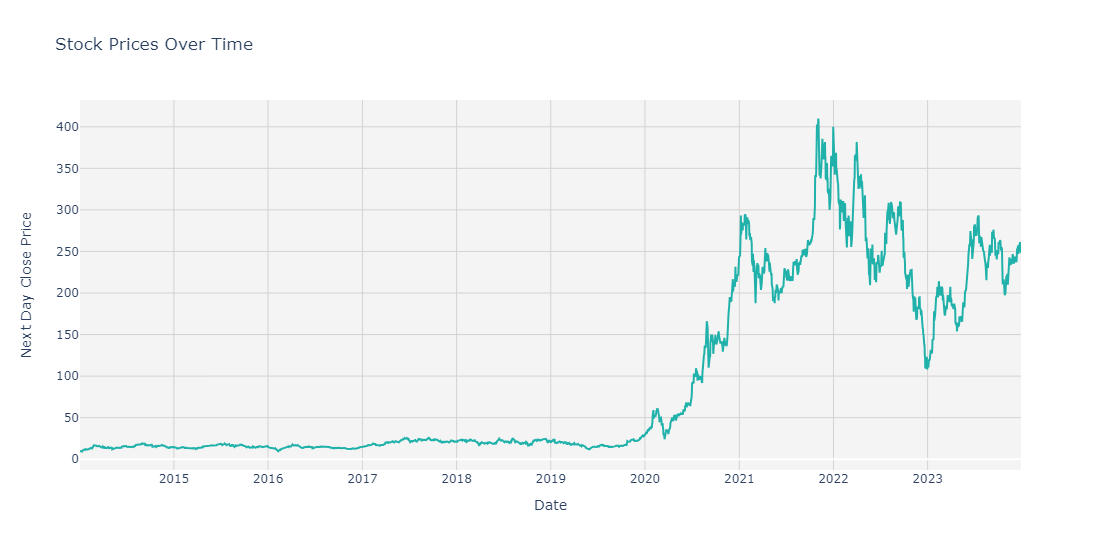

In [6]:


fig = go.Figure()

fig.add_trace(go.Scatter(x=df['date'], y=df['next_day_close'], mode='lines', line=dict(color='lightseagreen')))

fig.update_layout(title='Stock Prices Over Time',
                  xaxis_title='Date',
                  yaxis_title='Next Day Close Price',
                  plot_bgcolor='rgba(240, 240, 240, 0.7)',  # Setting background color
                  xaxis=dict(showgrid=True, gridcolor='lightgray'),  # Adding grid for x-axis
                  yaxis=dict(showgrid=True, gridcolor='lightgray'),  # Adding grid for y-axis
                  width=1100,  # Setting the width
                  height=550  # Setting the height
                 )

fig.show()


##### 2. The heatmap shows the correlation coefficients between features, with darker teal shades indicating stronger correlations. This visualization helps identify which features are positively or negatively related, aiding in feature selection and understanding relationships within the dataset.

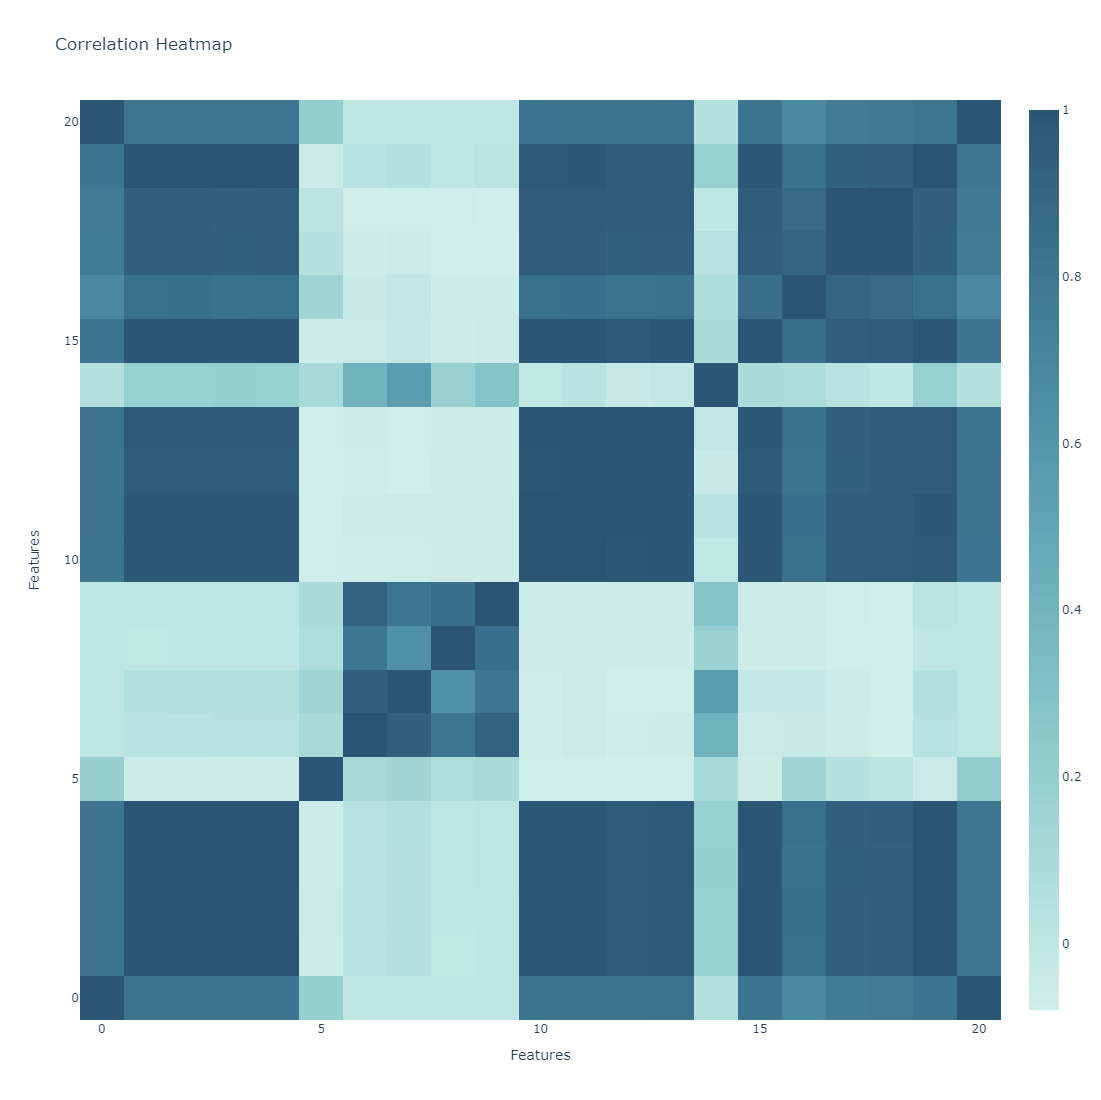

In [7]:

# Create the heatmap
fig = go.Figure(data=go.Heatmap(z=df.corr(), colorscale='teal'))

# Update the layout
fig.update_layout(title='Correlation Heatmap',
                  xaxis=dict(title='Features',showgrid=True,gridwidth=1.5,gridcolor='lightgray'),
                  yaxis=dict(title='Features',showgrid=True,gridwidth=1,gridcolor='lightgray'),
                  plot_bgcolor='rgba(240, 240, 240, 0.7)',  # Setting background color
                  width=1100,  # Setting the width
                  height=1100  # Setting the height
                 )

# Show the figure
fig.show()


##### 3. The histogram with a KDE overlay shows the distribution of the 'next day close' stock prices, indicating the frequency of different price ranges. This visualization helps in understanding the central tendency, spread, and shape of the stock prices distribution.

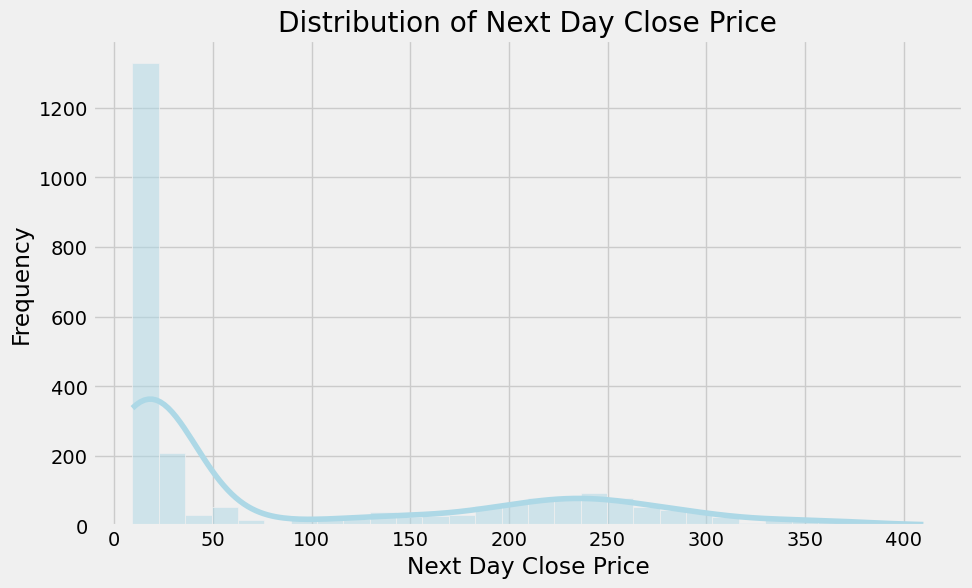

In [8]:
# Plot the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['next_day_close'], bins=30, kde=True, color='lightblue')
plt.title('Distribution of Next Day Close Price')
plt.xlabel('Next Day Close Price')
plt.ylabel('Frequency')
plt.show()


##### The below code snippet calculates 7-day and 30-day moving averages of 'next day close' prices and adds them as new columns in the DataFrame. It then removes any rows containing NaN values resulting from these calculations.

In [9]:
# Feature Engineering: Create new features (e.g., moving averages) (Suggestion 2)
df['ma_7'] = df['next_day_close'].rolling(window=7).mean()
df['ma_30'] = df['next_day_close'].rolling(window=30).mean()

# Drop rows with NaN values (resulting from moving averages)
df.dropna(inplace=True)


##### 4. The graph shows the 'next day close' stock prices over time, along with the 7-day and 30-day moving averages. It highlights both the short-term and longer-term trends in the stock's performance.

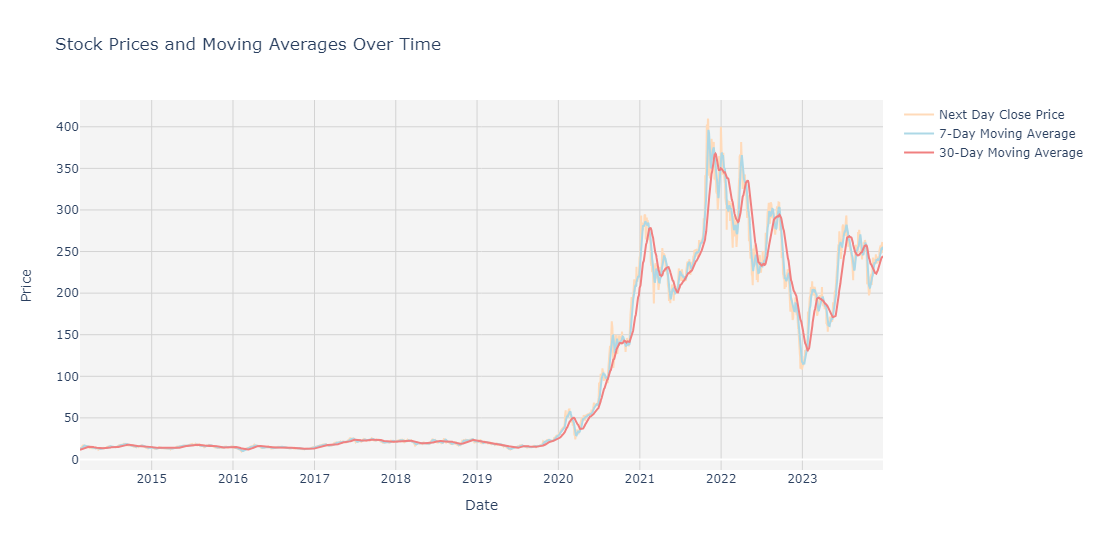

In [10]:


# Create traces for each line plot
trace_close = go.Scatter(x=df['date'], y=df['next_day_close'], mode='lines', name='Next Day Close Price', line=dict(color='peachpuff'))
trace_ma_7 = go.Scatter(x=df['date'], y=df['ma_7'], mode='lines', name='7-Day Moving Average', line=dict(color='lightblue'))
trace_ma_30 = go.Scatter(x=df['date'], y=df['ma_30'], mode='lines', name='30-Day Moving Average', line=dict(color='lightcoral'))

# Create the figure
fig = go.Figure()

# Add traces to the figure
fig.add_trace(trace_close)
fig.add_trace(trace_ma_7)
fig.add_trace(trace_ma_30)

# Update the layout
fig.update_layout(title='Stock Prices and Moving Averages Over Time',
                  xaxis=dict(title='Date',showgrid=True,gridwidth=1,gridcolor='lightgray'),
                  yaxis=dict(title='Price',showgrid=True,gridwidth=1,gridcolor='lightgray'),
                  plot_bgcolor='rgba(240, 240, 240, 0.7)',  # Setting background color
                  width=1100,  # Setting the width
                  height=550   # Setting the height
                 )

# Show the figure
fig.show()


### Split Data into Train and Test
- Train: Data from 2017 to 2022
- Test: Data for 2023

In [11]:
# Split the data into training and testing sets
# Training data: from the year 2017 to 2022
# Testing data: for the year 2023
df_train = df[(df.year < 2023) & (df.year > 2017)]
df_test = df[df.year == 2023]


# Print the number of records in the training and testing sets
print('Train Records: ', len(df_train))
print('Test Records: ', len(df_test))


Train Records:  1259
Test Records:  250


In [12]:
# Prepare the feature sets by dropping 'date', 'year', and 'next_day_close' columns
X_train = df_train.drop(['date', 'year', 'next_day_close'], axis=1)
X_test = df_test.drop(['date', 'year', 'next_day_close'], axis=1)

# Prepare the target sets by selecting the 'next_day_close' column
Y_train = df_train['next_day_close']
Y_test = df_test['next_day_close']


### Standardize the features

In [13]:


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Initialize and train different regression models

In [14]:
# Initialize and train different regression models (Suggestion 4)
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

# List to store metric values for different models
metric_vals = []


##### This code snippet iterates through a dictionary of machine learning models, fits each model to the scaled training data, makes predictions on the scaled test data, and evaluates each model's performance using three metrics: R-squared (R2), mean absolute error (MAE), and mean squared error (MSE). It then prints the evaluation metrics for each model and displays them in a DataFrame for easy comparison, providing insights into the relative performance of different models.

In [15]:

for name, model in models.items():
    model.fit(X_train_scaled, Y_train)
    pred = model.predict(X_test_scaled)
    r2 = np.round(r2_score(Y_test, pred), 2)
    mae = np.round(mean_absolute_error(Y_test, pred), 2)
    mse = np.round(mean_squared_error(Y_test, pred), 2)
    metric_vals.append([name, r2, mae, mse])
    print(f'\nModel: {name}')
    print('R2: ', r2)
    print('MAE: ', mae)
    print('MSE: ', mse)

# Display the metrics for comparison (Suggestion 4)
metrics_df = pd.DataFrame(metric_vals, columns=['Model', 'R2', 'MAE', 'MSE'])
print("\nModel Performance Comparison:")
print(metrics_df)



Model: Linear Regression
R2:  0.98
MAE:  4.14
MSE:  28.23

Model: Decision Tree
R2:  0.92
MAE:  9.08
MSE:  128.21

Model: Random Forest
R2:  0.96
MAE:  6.08
MSE:  62.21

Model Performance Comparison:
               Model    R2   MAE     MSE
0  Linear Regression  0.98  4.14   28.23
1      Decision Tree  0.92  9.08  128.21
2      Random Forest  0.96  6.08   62.21


##### The below code snippet sets up a grid of hyperparameters for RandomForest, varying the number of trees, maximum depth of trees, minimum samples required to split a node, and minimum samples required to be a leaf node. This facilitates an exhaustive search to identify the optimal combination of hyperparameters for the RandomForest model.

In [16]:

# Hyperparameter Tuning using GridSearchCV for RandomForest (Suggestion 5)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

##### Initializes a RandomForestRegressor, performs hyperparameter tuning using GridSearchCV with a specified parameter grid, and fits the model to the training data using cross-validation. Finally, it prints the best combination of hyperparameters found through the grid search.

In [17]:
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, Y_train)

print("Best Parameters for Random Forest: ", grid_search.best_params_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters for Random Forest:  {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}


##### Training a RandomForestRegressor with the best parameters found through the grid search. It then makes predictions on the scaled test data, evaluates the model's performance using R-squared (R2), mean absolute error (MAE), and mean squared error (MSE), and prints the evaluation metrics for the best Random Forest model.

In [18]:


# Train Random Forest with best parameters
best_rf = grid_search.best_estimator_
best_rf.fit(X_train_scaled, Y_train)
rf_pred = best_rf.predict(X_test_scaled)
rf_r2 = np.round(r2_score(Y_test, rf_pred), 2)
rf_mae = np.round(mean_absolute_error(Y_test, rf_pred), 2)
rf_mse = np.round(mean_squared_error(Y_test, rf_pred), 2)

print(f'\nBest Random Forest Model')
print('R2: ', rf_r2)
print('MAE: ', rf_mae)
print('MSE: ', rf_mse)



Best Random Forest Model
R2:  0.97
MAE:  5.95
MSE:  59.62


##### 5. The graph illustrates the relative importance of each feature in the Random Forest model for predicting the target variable. Features are sorted by their importance, with the most important feature at the top. The height of each bar represents the importance of the corresponding feature, aiding in identifying which features have the most significant impact on the model's predictions.

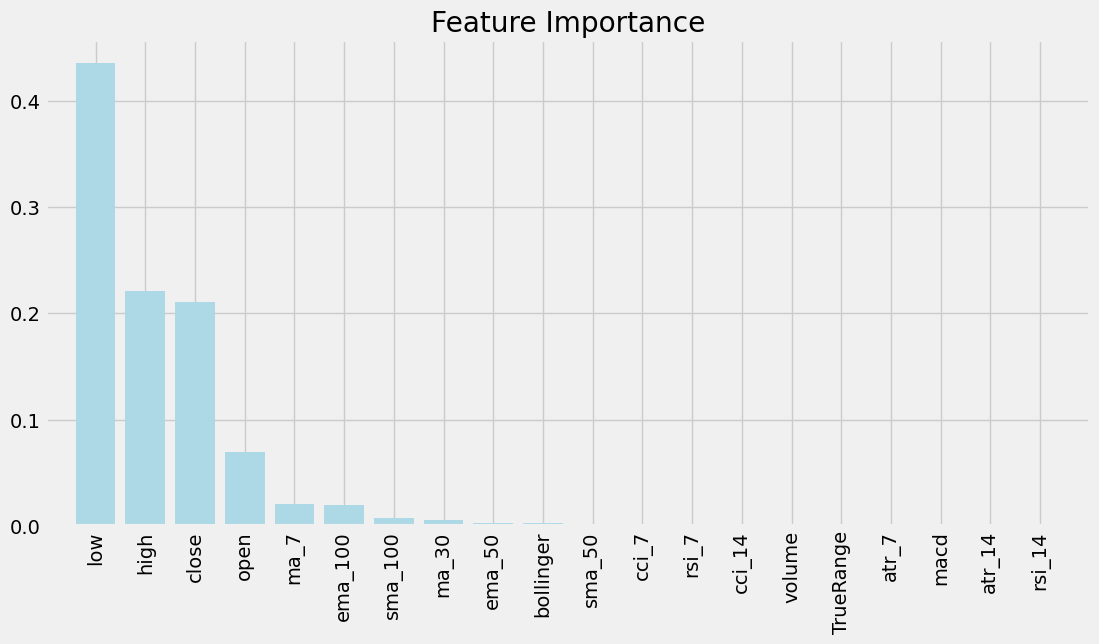

In [19]:
# Feature Importance Plot for Random Forest
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns

plt.figure(figsize=(12, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], align="center",color='lightblue')
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


##### 6. The residual plot visualizes the difference between the actual target values and the predicted values generated by the best Random Forest model. Each point represents a data point, where the x-coordinate is the predicted value and the y-coordinate is the residual (the difference between the actual and predicted values). The dashed line at y=0 indicates perfect prediction, with points ideally scattered evenly around it. Patterns or trends in the plot suggest that the model may have systematic errors or biases.

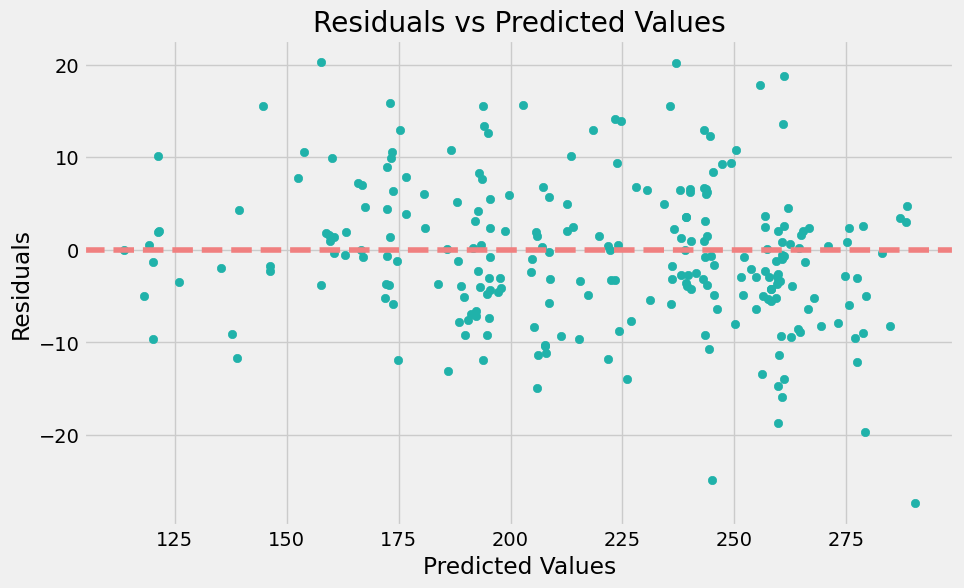

In [20]:
# Residual Plot for the best model
residuals = Y_test - rf_pred

plt.figure(figsize=(10, 6))
plt.scatter(rf_pred, residuals,color='lightseagreen')
plt.axhline(y=0, color='lightcoral', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()



##### 7. The scatter plot compares the actual target values (Y_test) against the predicted values generated by the best Random Forest model. Each point represents a data instance, where the x-coordinate is the actual value, and the y-coordinate is the predicted value. The diagonal dashed line represents perfect predictions, with points ideally falling along it. Deviations from this line indicate discrepancies between actual and predicted values, allowing assessment of the model's performance across the entire range of target values.

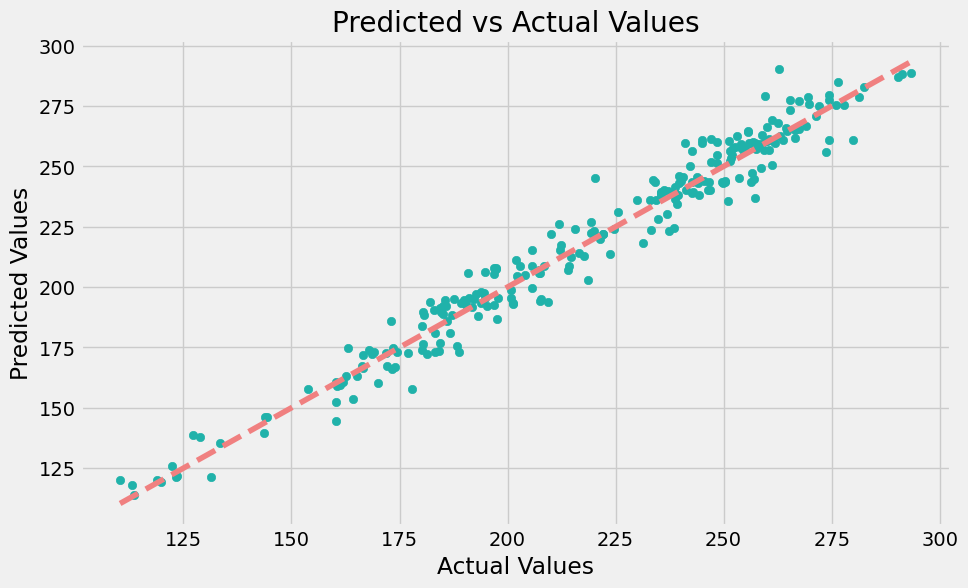

In [21]:
# Predicted vs Actual Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, rf_pred, color='lightseagreen')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)],color='lightcoral', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()


##### This code utilizes the SHAP (SHapley Additive exPlanations) library to interpret the best Random Forest model's predictions. It creates an explainer object to compute SHAP values for each feature's impact on the model's output. The SHAP summary plot visualizes the average impact of each feature on the model predictions, highlighting which features contribute the most to the model's decisions.

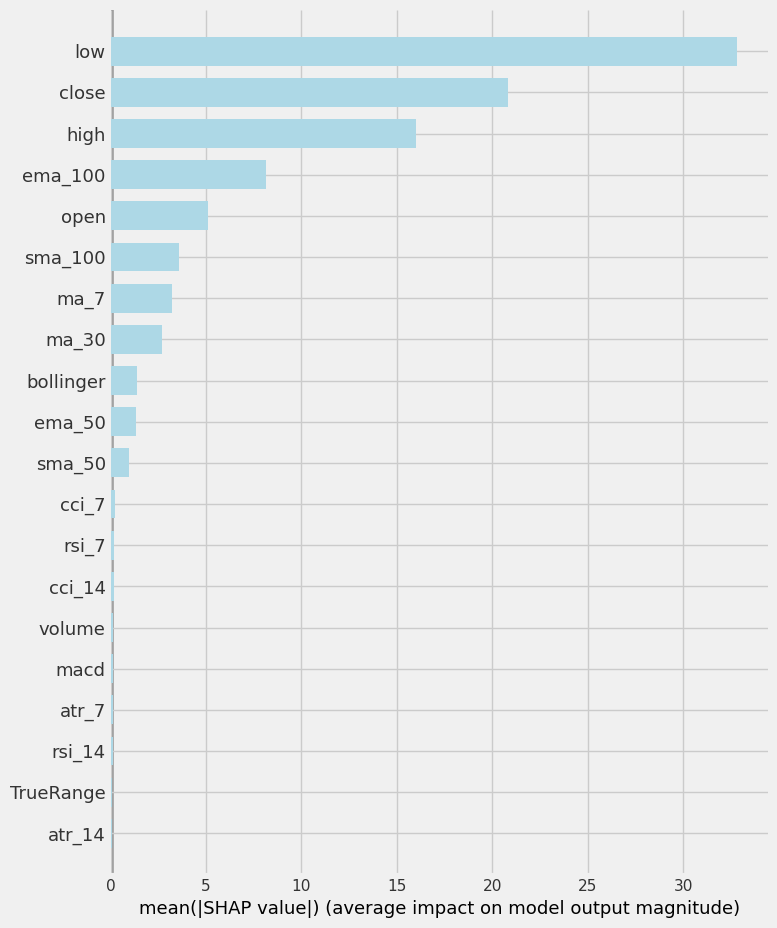

In [22]:

# Model Interpretation using SHAP (Suggestion 6)
explainer = shap.Explainer(best_rf, X_train_scaled)
shap_values = explainer(X_test_scaled)

# SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar", color='lightblue')


##### This code prepares a DataFrame (`df_test_preds`) to store true values and predicted values for the best model. It selects the 'date' and 'next_day_close' columns from the test dataset (`df_test`), renames 'next_day_close' to 'y_true', sets the 'date' column as the index, and adds a new column 'pred' containing the predicted values (`rf_pred`) from the best Random Forest model.

In [23]:

# Prepare the DataFrame to store true values and predicted values for the best model
df_test_preds = df_test[['date', 'next_day_close']]
df_test_preds.columns = ['date', 'y_true']
df_test_preds = df_test_preds.set_index('date')
df_test_preds['pred'] = rf_pred


##### 8. This code plots the actual versus predicted values for all models in the `models` dictionary. Each model's predictions are represented by markers with pastel colors, with the actual values plotted on the x-axis and the predicted values on the y-axis. The red dashed line represents perfect predictions, where actual and predicted values are equal. This visualization allows for a comparative assessment of the performance of different models across the range of target values.

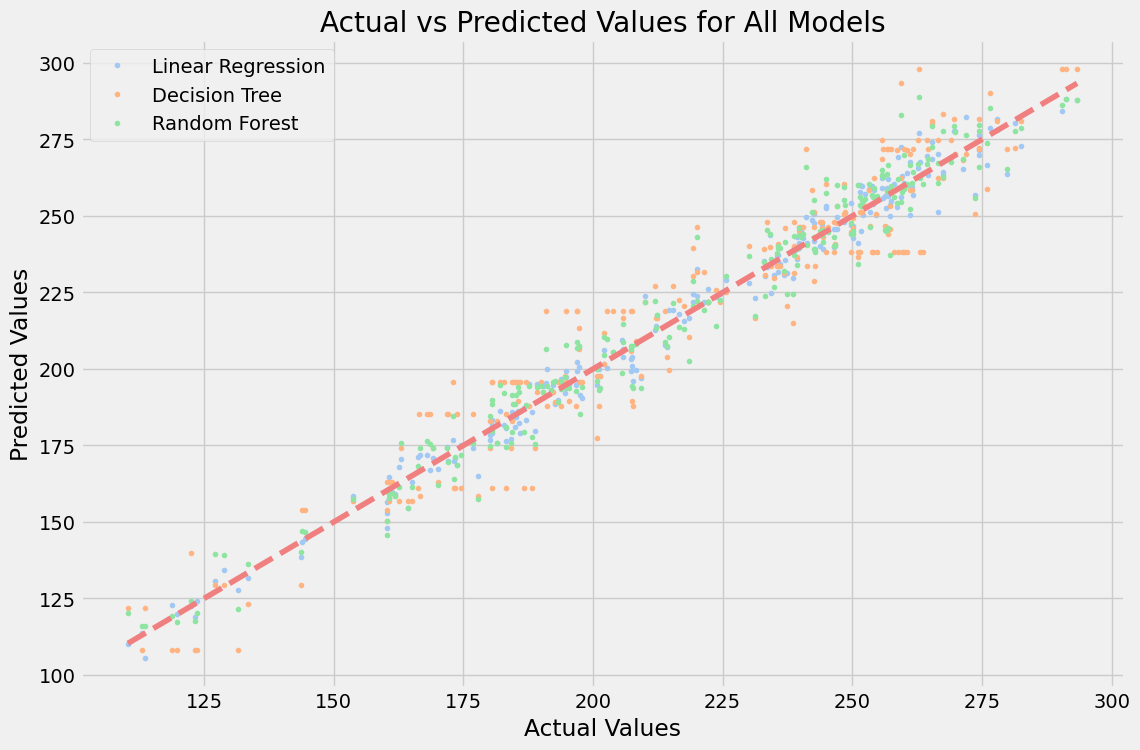

In [24]:
# Plot actual vs predicted values for all models
plt.figure(figsize=(12, 8))

pastel_colors = sns.color_palette('pastel', len(models))

for i, (name, model) in enumerate(models.items()):
    model.fit(X_train_scaled, Y_train)
    pred = model.predict(X_test_scaled)
    plt.plot(Y_test, pred, marker='o', linestyle='', ms=3, label=name, color=pastel_colors[i])

plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], 'r--', color='lightcoral')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for All Models')
plt.legend()
plt.show()


##### 9. The function `plotActualPred` creates an interactive plot comparing the actual versus predicted values for a given model. It utilizes Plotly to generate a line plot where the x-axis represents the dates and the y-axis represents the stock prices. The actual values are shown in light seagreen, and the predicted values are displayed in light pink. The title of the plot includes the name of the model being visualized. This interactive visualization allows for a detailed examination of how well the model's predictions align with the actual values over time.

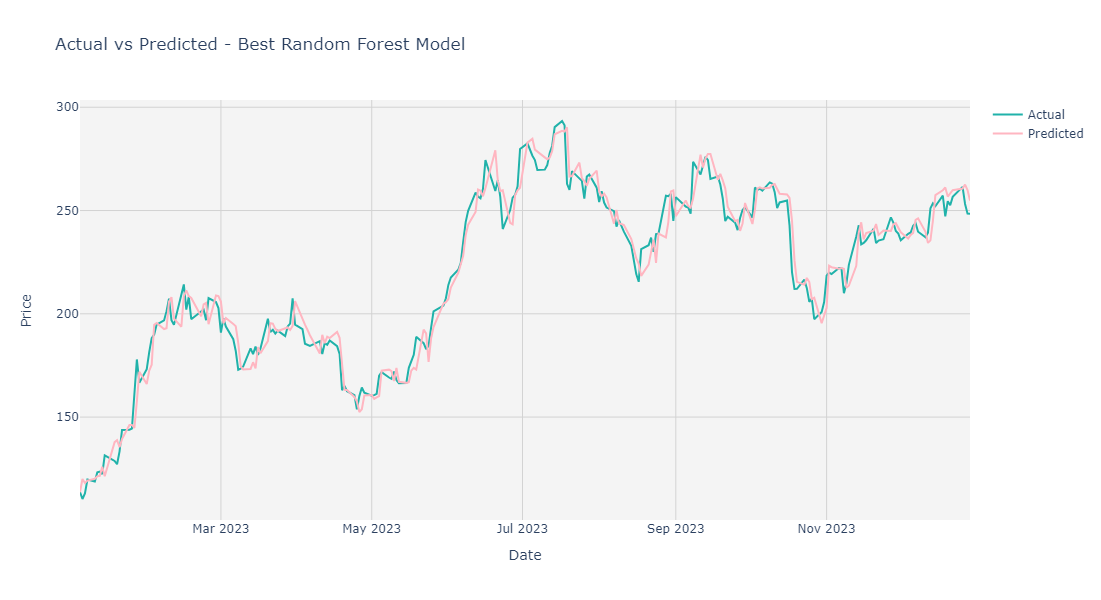

In [25]:


# Define a function to plot the actual vs predicted values interactively
def plotActualPred(df_test_pred, mName):
    fig = go.Figure()

    # Add scatter trace for actual values
    fig.add_trace(go.Scatter(x=df_test_pred.index, y=df_test_pred['y_true'], mode='lines', name='Actual', line=dict(color='lightseagreen')))

    # Add scatter trace for predicted values
    fig.add_trace(go.Scatter(x=df_test_pred.index, y=df_test_pred['pred'], mode='lines', name='Predicted', line=dict(color='lightpink')))

    # Update the layout
    fig.update_layout(title="Actual vs Predicted - " + mName,
                      xaxis=dict(title='Date',showgrid=True,gridwidth=1,gridcolor='lightgray'),
                      yaxis=dict(title='Price',showgrid=True,gridwidth=1,gridcolor='lightgray'),
                      plot_bgcolor='rgba(240, 240, 240, 0.7)',  # Setting background color
                      width=1100,  # Setting the width
                      height=600   # Setting the height
                     )

    # Show the figure
    fig.show()

# Plot actual vs predicted values for the best model (Suggestion 7)
plotActualPred(df_test_preds, "Best Random Forest Model")
